In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] = boston.target

bos = bos.sample(frac = 1, random_state = 3)

In [21]:
y = bos['price']
X = bos.drop('price', axis = 1)

### Recursive Feature Elimination

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr = LinearRegression()

rfe = RFE(lr, n_features_to_select = 11)
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=11, step=1, verbose=0)

In [41]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [42]:
pd.DataFrame(rfe.ranking_, index = X.columns, columns = ['select'])

,select
CRIM,1
ZN,1
INDUS,1
CHAS,1
NOX,1
RM,1
AGE,3
DIS,1
RAD,1
TAX,1


In [43]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)


In [44]:
no_ofcols = X.shape[1]
score_list = []
rmse_list = []

for n in range(no_ofcols):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select = n+1)
    rfe.fit(X_train, y_train)
    y_test_pred = rfe.predict(X_test)
    score = r2_score(y_test, y_test_pred )
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    score_list.append(score)
    rmse_list.append(rmse)

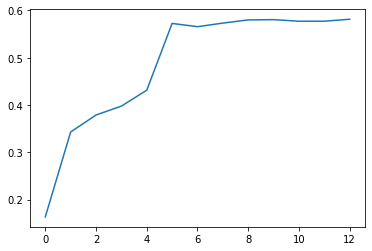

In [45]:
plt.plot(score_list)

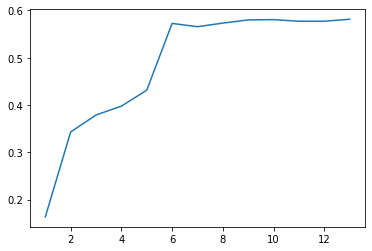

In [46]:

plt.plot(range(1,14), score_list)

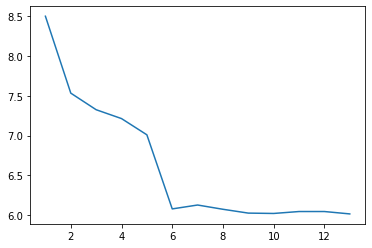

In [47]:
plt.plot(range(1,14), rmse_list)

The results of r2 and rmse shows that we are getting values very close to maximum when no. of features = 10. Hence, we will choose 10 as the optimal no. to keeo\p

In [49]:
rfe = RFE(lr, n_features_to_select = 10)
rfe.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [50]:
rf = pd.DataFrame(rfe.ranking_, index = X.columns, columns = ['ranks'])
rf = rf.sort_values(by = 'ranks')
rf

,ranks
CRIM,1
ZN,1
INDUS,1
CHAS,1
NOX,1
RM,1
DIS,1
RAD,1
PTRATIO,1
LSTAT,1


In [51]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [65]:
from sklearn.model_selection import KFold, GridSearchCV

kf = KFold(n_splits =3, random_state = 3)

params = {'n_features_to_select': list(range(1,14))}

lr = LinearRegression()
rfe = RFE(lr)

gsearch = GridSearchCV(rfe, param_grid = params, cv = 3, scoring = 'r2', return_train_score = True)

gsearch.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [66]:
gsearch.best_params_

{'n_features_to_select': 13}

In [67]:
gs = pd.DataFrame(gsearch.cv_results_)

In [68]:
gs.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.011968,0.000815,0.001661,4.707525e-04,1,{'n_features_to_select': 1},0.199862,0.158002,0.184327,0.180723,0.017294,13,0.174418,0.192692,0.180015,0.182375,0.007644
1,0.011635,0.000941,0.000997,4.052337e-07,2,{'n_features_to_select': 2},0.620833,0.497652,0.483520,0.534101,0.061690,12,0.494590,0.552738,0.561023,0.536117,0.029558
2,0.011968,0.000814,0.001330,4.697412e-04,3,{'n_features_to_select': 3},0.587543,0.524968,0.519504,0.544053,0.030878,11,0.535370,0.569403,0.568948,0.557907,0.015937


No handles with labels found to put in legend.


Text(0, 0.5, 'r-square')

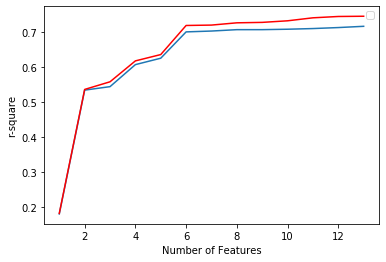

In [69]:
plt.plot(gs['param_n_features_to_select'], gs['mean_test_score'])
plt.plot(gs['param_n_features_to_select'], gs['mean_train_score'], 'r')
plt.xlabel('Number of Features')
plt.legend()
plt.ylabel('r-square')

### Step Forward Selection

In [71]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [72]:
lr = LinearRegression()

kf = KFold(n_splits = 3, random_state = 3)
sfs1 = sfs(lr, k_features = 13, scoring = 'r2', cv = kf)

sfs1.fit(X, y)

SequentialFeatureSelector(clone_estimator=True,
                          cv=KFold(n_splits=3, random_state=3, shuffle=False),
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=13, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [73]:
sfs1.subsets_

{1: {'feature_idx': (12,),
  'cv_scores': array([0.47498301, 0.56609828, 0.57455135]),
  'avg_score': 0.5385442127122603,
  'feature_names': ('LSTAT',)},
 2: {'feature_idx': (5, 12),
  'cv_scores': array([0.60036603, 0.65293983, 0.63135447]),
  'avg_score': 0.6282201069923401,
  'feature_names': ('RM', 'LSTAT')},
 3: {'feature_idx': (5, 10, 12),
  'cv_scores': array([0.65745471, 0.68441498, 0.66421068]),
  'avg_score': 0.6686934564375585,
  'feature_names': ('RM', 'PTRATIO', 'LSTAT')},
 4: {'feature_idx': (5, 7, 10, 12),
  'cv_scores': array([0.67016622, 0.70001991, 0.67424572]),
  'avg_score': 0.6814772826504827,
  'feature_names': ('RM', 'DIS', 'PTRATIO', 'LSTAT')},
 5: {'feature_idx': (4, 5, 7, 10, 12),
  'cv_scores': array([0.70589773, 0.70338011, 0.67346229]),
  'avg_score': 0.6942467104909952,
  'feature_names': ('NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')},
 6: {'feature_idx': (4, 5, 7, 10, 11, 12),
  'cv_scores': array([0.71000238, 0.71462993, 0.67781512]),
  'avg_score': 0.7008158

In [75]:
sf = pd.DataFrame(sfs1.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)","[0.4749830090548759, 0.5660982817170748, 0.574...",0.538544,"(LSTAT,)"
2,"(5, 12)","[0.6003660252605316, 0.6529398298950582, 0.631...",0.62822,"(RM, LSTAT)"
3,"(5, 10, 12)","[0.6574547085117268, 0.6844149765905737, 0.664...",0.668693,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)","[0.6701662157084982, 0.7000199113250303, 0.674...",0.681477,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)","[0.7058977311250213, 0.7033801102200267, 0.673...",0.694247,"(NOX, RM, DIS, PTRATIO, LSTAT)"
6,"(4, 5, 7, 10, 11, 12)","[0.7100023770635135, 0.7146299333738408, 0.677...",0.700816,"(NOX, RM, DIS, PTRATIO, B, LSTAT)"
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7042370034440062, 0.7236060770908831, 0.689...",0.705848,"(CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"
8,"(3, 4, 5, 7, 8, 10, 11, 12)","[0.7072017496995515, 0.7274380228793207, 0.695...",0.710058,"(CHAS, NOX, RM, DIS, RAD, PTRATIO, B, LSTAT)"
9,"(3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.715543873547657, 0.733556097889901, 0.69250...",0.713867,"(CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT)"
10,"(1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7239641006709546, 0.7267455672126852, 0.699...",0.716864,"(ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B,..."


Text(0, 0.5, 'r-squared')

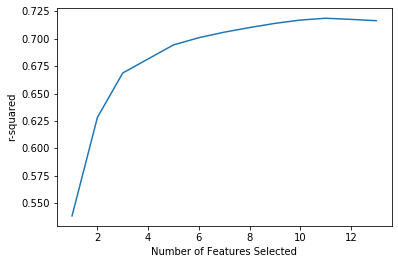

In [80]:
plt.plot(range(1,14), sf['avg_score'])
plt.xlabel('Number of Features Selected')
plt.ylabel('r-squared')


Verbose = 2 output showed that r-squared is reaching a peak at 'number of features' = 11. Hence, we will run sfs again with k_features = 11 to identify the selected features.

In [82]:
lr = LinearRegression()

kf = KFold(n_splits = 3, random_state = 3)
sfs1 = sfs(lr, k_features = 11, scoring = 'r2', cv = kf, verbose = 2)

sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2020-03-11 14:32:01] Features: 1/11 -- score: 0.5385442127122603[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2020-03-11 14:32:01] Features: 2/11 -- score: 0.6282201069923401[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-03-11 14:32:01] Features: 3/11 -- score: 0.6686934564375585[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(clone_estimator=True,
                          cv=KFold(n_splits=3, random_state=3, shuffle=False),
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=11, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=2)

In [86]:
cols = list(sfs1.k_feature_names_)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size = 0.3, random_state = 2)

In [96]:
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('r-squared on Train: ', r2_score(y_train, y_train_pred))
print('r-squared on Test: ', r2_score(y_test, y_test_pred))

r-squared on Train:  0.745118122002017
r-squared on Test:  0.7195983903480653
